In [174]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [176]:
pytrends= TrendReq(hl='en-US',tz=360)
keyword="ai"

In [177]:
#Data Request

In [178]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

In [179]:
#country wise interest

In [180]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

C:\Users\jayak\AppData\Local\Temp\ipykernel_20408\3746368091.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




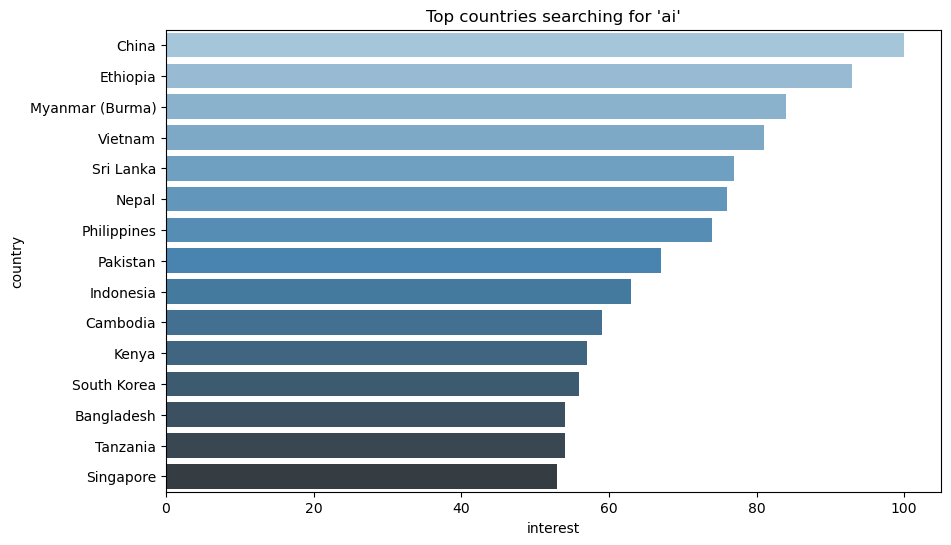

In [181]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top countries searching for '{keyword}'")
plt.xlabel("interest")
plt.ylabel("country")
plt.show()

In [182]:
##World Map

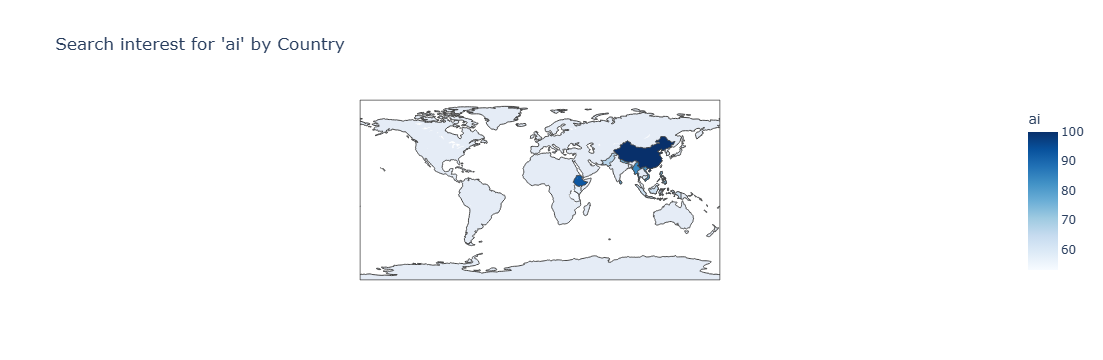

In [207]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                 locations='geoName',
                 locationmode='country names',
                 color=keyword,
                 title=f"Search interest for '{keyword}' by Country",
                 color_continuous_scale='Blues')
fig.show()

#time wise interest

In [185]:
time_df=pytrends.interest_over_time()

C:\Users\jayak\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



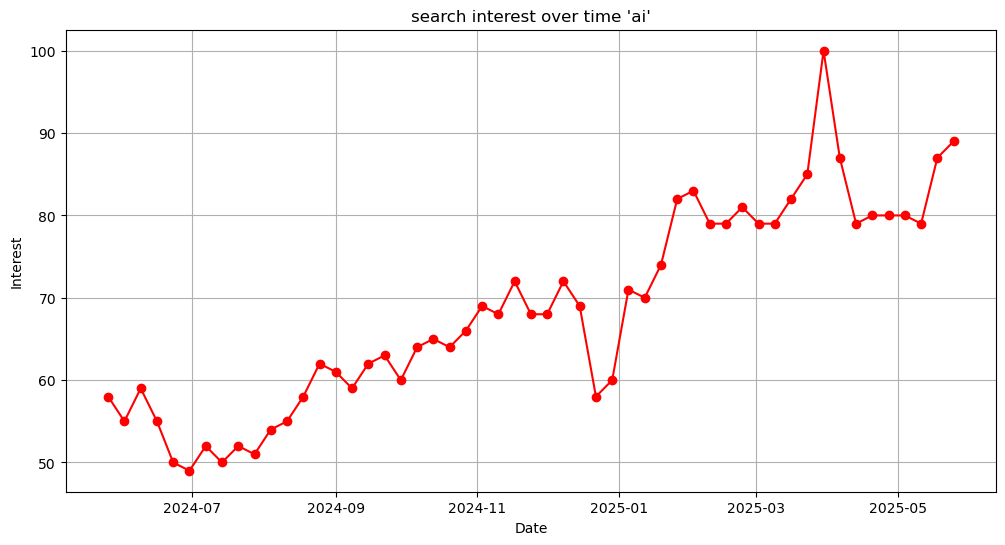

In [186]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='red')
plt.title(f"search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

#PLot the graph of multiple keyword

In [228]:
kw_list=["cloud computing","data science","machine learning","Elon musk","tariff"]
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

C:\Users\jayak\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



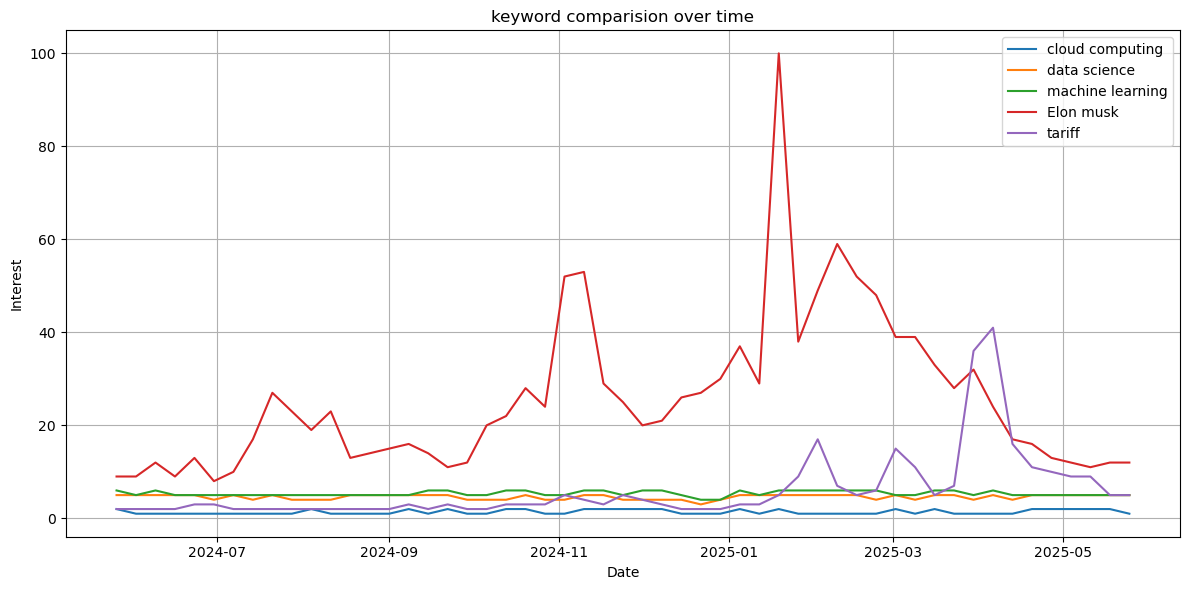

In [230]:
compare_df=pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)
plt.title("keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
           